# Source :
https://github.com/Oracen-zz/MIDAS/tree/master 


In [1]:
from sklearn.preprocessing import MinMaxScaler
from midas import Midas
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('merge_df.csv')

In [3]:
#Neuropsychology 피처
ne = ['소요시간',
 'RT_A3',
 'RT_A4',
 'RT_A5',
 'RT_A8',
 'RT_A10',
 '소요시간.1',
 'RT_B1',
 'RT_B2',
 'RT_B3',
 'RT_B5',
 'RT_B9',
 'RT_A_median',
 'RT_A_sd',
 'RT_A_min',
 'RT_A_max',
 'RT_B_sum',
 'RT_B_median',
 'RT_B_sd',
 'RT_B_min',
 'RT_B_max',
 '정답수.2',
 'cal10.1',
 'RT_cal1',
 'RT_cal2',
 'RT_cal3',
 'RT_cal4',
 'RT_cal6',
 'RT_cal7',
 'RT_cal8',
 'RT_cal9',
 'RT_cal10',
 'RT_cal12',
 'RT_cal_sum',
 'RT_cal_median',
 '소요시간.2',
 '정답수.3',
 'RT_sa1',
 'RT_sa2',
 'RT_sa3',
 'RT_sa4',
 'RT_sa5',
 'RT_sa6',
 'RT_sa_sum',
 'RT_sa_mean',
 'RT_sa_sd',
 'RT_sa_min',
 'RT_sa_max',
 '소요시간.5',
 '소요시간.6',
 '소요시간.7', 'Key']
n_df = df[ne]

In [16]:
#SP 결측치처리
ls = []

for i in df.columns:
    if 'SP' in i:
        ls.append(i)
        
sp_df = df[ls]

m_df = pd.concat([n_df, sp_df], axis=1)
    
columns_list = []
key = m_df['Key']
m_df = m_df.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = m_df.isnull()
m_df.fillna(m_df.median(), inplace= True)
m_df_s = pd.DataFrame(scaler.fit_transform(m_df), columns= m_df.columns)
m_df_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(m_df_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key

Size index: [96]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 23.406400786505806
Epoch: 1 , loss: 18.672627025180393
Epoch: 2 , loss: 15.750083340538872
Epoch: 3 , loss: 14.128642135196262
Epoch: 4 , loss: 13.145691553751627
Epoch: 5 , loss: 12.445405801137289
Epoch: 6 , loss: 11.85199303097195
Epoch: 7 , loss: 11.625389787885878
Epoch: 8 , loss: 11.305125342475044
Epoch: 9 , loss: 11.052453253004286
Epoch: 10 , loss: 10.82201952404446
Epoch: 11 , loss: 10.721906450059679
Epoch: 12 , loss: 10.574119938744438
Epoch: 13 , loss: 10.387486775716146
Epoch: 14 , loss: 10.356389734480116
Epoch: 15 , loss: 10.262583096822103
Epoch: 16 , loss: 10.259529219733345
Epoch: 17 , loss: 10.155996163686117
Epoch: 18 , loss: 10.047800434960259
Epoch: 19 , loss: 10.053631888495552
Epoch: 20 , loss: 10.016584634780884
Epoch: 21 , loss: 9.99555656645033
Epoch: 22 , loss: 9.96593878004286
Epoch: 23 , loss: 9.889701233969795
Epoch: 24 , loss: 9.882351875305176
Epoch: 25 , loss: 9.88110

In [17]:
pd.set_option('display.max_rows',None)
m_df.isnull().sum()

소요시간                    0
RT_A3                   0
RT_A4                   0
RT_A5                   0
RT_A8                   0
RT_A10                  0
소요시간.1                  0
RT_B1                   0
RT_B2                   0
RT_B3                   0
RT_B5                   0
RT_B9                   0
RT_A_median             0
RT_A_sd                 0
RT_A_min                0
RT_A_max                0
RT_B_sum                0
RT_B_median             0
RT_B_sd                 0
RT_B_min                0
RT_B_max                0
정답수.2                   0
cal10.1                 0
RT_cal1                 0
RT_cal2                 0
RT_cal3                 0
RT_cal4                 0
RT_cal6                 0
RT_cal7                 0
RT_cal8                 0
RT_cal9                 0
RT_cal10                0
RT_cal12                0
RT_cal_sum              0
RT_cal_median           0
소요시간.2                  0
정답수.3                   0
RT_sa1                  0
RT_sa2      

In [18]:
ls = ['Key']

for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.drop('cutoff',axis=1).columns)]
df1.shape

(289, 251)

# WMS 시작

In [19]:
df2= df1.copy()

In [21]:
df1=df2.copy()

In [22]:
# WMS 결측치처리
nonan_merge = df1.dropna(axis=1)

ls = []

for i in df1.columns:
    if 'WMS' in i:
        ls.append(i)

for c in nonan_merge.columns:
    ls.append(c)
ls=list(set(ls))

m_df = df1[ls]
   
columns_list = []
key = m_df['Key']
m_df = m_df.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = m_df.isnull()
m_df.fillna(m_df.median(), inplace= True)
m_df_s = pd.DataFrame(scaler.fit_transform(m_df), columns= m_df.columns)
m_df_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(m_df_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key

Size index: [148]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 40.38428772820367
Epoch: 1 , loss: 32.051307148403595
Epoch: 2 , loss: 27.787011358473038
Epoch: 3 , loss: 25.24330711364746
Epoch: 4 , loss: 23.770038710700142
Epoch: 5 , loss: 22.73960092332628
Epoch: 6 , loss: 21.981007152133518
Epoch: 7 , loss: 21.41856426662869
Epoch: 8 , loss: 20.890329784817165
Epoch: 9 , loss: 20.626164118448894
Epoch: 10 , loss: 20.205250528123642
Epoch: 11 , loss: 19.957979732089573
Epoch: 12 , loss: 19.75761932796902
Epoch: 13 , loss: 19.52723566691081
Epoch: 14 , loss: 19.2750276989407
Epoch: 15 , loss: 19.212793244255913
Epoch: 16 , loss: 19.130048116048176
Epoch: 17 , loss: 19.04699812995063
Epoch: 18 , loss: 18.901894993252224
Epoch: 19 , loss: 18.870580249362522
Epoch: 20 , loss: 18.797097206115723
Epoch: 21 , loss: 18.732845730251736
Epoch: 22 , loss: 18.640937169392902
Epoch: 23 , loss: 18.613747384813095
Epoch: 24 , loss: 18.62994533114963
Epoch: 25 , loss: 18.58911

In [23]:
ls = ['Key']

for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.drop('cutoff',axis=1).columns)]
df1.shape

(289, 251)

In [24]:
# PD 결측치처리
nonan_merge = df1.dropna(axis=1)

ls = []

for i in df1.columns:
    if 'PD' in i:
        ls.append(i)

for c in nonan_merge.columns:
    ls.append(c)
ls=list(set(ls))

m_df = df1[ls]
   
columns_list = []
key = m_df['Key']
m_df = m_df.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = m_df.isnull()
m_df.fillna(m_df.median(), inplace= True)
m_df_s = pd.DataFrame(scaler.fit_transform(m_df), columns= m_df.columns)
m_df_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(m_df_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key

Size index: [169]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 45.20960574679904
Epoch: 1 , loss: 36.226131439208984
Epoch: 2 , loss: 31.42404588063558
Epoch: 3 , loss: 28.70674811469184
Epoch: 4 , loss: 26.859634823269314
Epoch: 5 , loss: 25.75611898634169
Epoch: 6 , loss: 24.80630079905192
Epoch: 7 , loss: 23.963911798265244
Epoch: 8 , loss: 23.57467524210612
Epoch: 9 , loss: 23.054395993550617
Epoch: 10 , loss: 22.75033738878038
Epoch: 11 , loss: 22.40472263760037
Epoch: 12 , loss: 22.070885128445095
Epoch: 13 , loss: 21.942144287957085
Epoch: 14 , loss: 21.583060794406467
Epoch: 15 , loss: 21.48650466071235
Epoch: 16 , loss: 21.37233289082845
Epoch: 17 , loss: 21.271456082661945
Epoch: 18 , loss: 21.138395415412056
Epoch: 19 , loss: 20.99269898732503
Epoch: 20 , loss: 20.96687020195855
Epoch: 21 , loss: 20.972694291008843
Epoch: 22 , loss: 20.798854298061794
Epoch: 23 , loss: 20.82452604505751
Epoch: 24 , loss: 20.668445587158203
Epoch: 25 , loss: 20.69762526

In [25]:
ls = ['Key']

for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.drop('cutoff',axis=1).columns)]
df1.shape

(289, 251)

In [26]:
df1.isnull().sum()

소요시간                              0
RT_A3                             0
RT_A4                             0
RT_A5                             0
RT_A8                             0
RT_A10                            0
소요시간.1                            0
RT_B1                             0
RT_B2                             0
RT_B3                             0
RT_B5                             0
RT_B9                             0
RT_A_median                       0
RT_A_sd                           0
RT_A_min                          0
RT_A_max                          0
RT_B_sum                          0
RT_B_median                       0
RT_B_sd                           0
RT_B_min                          0
RT_B_max                          0
정답수.2                             0
cal10.1                           0
RT_cal1                           0
RT_cal2                           0
RT_cal3                           0
RT_cal4                           0
RT_cal6                     

# AntiSaccade

In [27]:
# AntiSaccade 결측치처리
nonan_merge = df1.dropna(axis=1)

ls = []

for i in df1.columns:
    if 'AntiSaccade' in i:
        ls.append(i)

for c in nonan_merge.columns:
    ls.append(c)
ls=list(set(ls))

m_df = df1[ls]
   
columns_list = []
key = m_df['Key']
m_df = m_df.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = m_df.isnull()
m_df.fillna(m_df.median(), inplace= True)
m_df_s = pd.DataFrame(scaler.fit_transform(m_df), columns= m_df.columns)
m_df_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(m_df_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key

Size index: [199]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 51.6945480770535
Epoch: 1 , loss: 40.96776156955295
Epoch: 2 , loss: 35.73487578497993
Epoch: 3 , loss: 33.01576063368056
Epoch: 4 , loss: 31.000536070929634
Epoch: 5 , loss: 29.741392665439182
Epoch: 6 , loss: 28.758404201931423
Epoch: 7 , loss: 27.987991756863064
Epoch: 8 , loss: 27.35382800632053
Epoch: 9 , loss: 26.832931730482315
Epoch: 10 , loss: 26.254772398206924
Epoch: 11 , loss: 25.982790099249947
Epoch: 12 , loss: 25.54893642001682
Epoch: 13 , loss: 25.38355647193061
Epoch: 14 , loss: 25.145451333787705
Epoch: 15 , loss: 24.933906449211968
Epoch: 16 , loss: 24.73607932196723
Epoch: 17 , loss: 24.605167706807453
Epoch: 18 , loss: 24.531908882988823
Epoch: 19 , loss: 24.449390199449326
Epoch: 20 , loss: 24.38000710805257
Epoch: 21 , loss: 24.25611644321018
Epoch: 22 , loss: 24.152594354417587
Epoch: 23 , loss: 24.15303940243191
Epoch: 24 , loss: 24.06162961324056
Epoch: 25 , loss: 23.97939893

In [28]:
ls = ['Key']

for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.drop('cutoff',axis=1).columns)]
df1.shape

(289, 251)

In [29]:
df1.isnull().sum()

소요시간                              0
RT_A3                             0
RT_A4                             0
RT_A5                             0
RT_A8                             0
RT_A10                            0
소요시간.1                            0
RT_B1                             0
RT_B2                             0
RT_B3                             0
RT_B5                             0
RT_B9                             0
RT_A_median                       0
RT_A_sd                           0
RT_A_min                          0
RT_A_max                          0
RT_B_sum                          0
RT_B_median                       0
RT_B_sd                           0
RT_B_min                          0
RT_B_max                          0
정답수.2                             0
cal10.1                           0
RT_cal1                           0
RT_cal2                           0
RT_cal3                           0
RT_cal4                           0
RT_cal6                     

In [30]:
# Saccade 결측치처리 100이하
nonan_merge = df1.dropna(axis=1)

ls = []

for i in df1.columns:
    if 'Saccade' in i:
        ls.append(i)

for c in nonan_merge.columns:
    ls.append(c)
ls=list(set(ls))

m_df = df1[ls]

drop_list = []
for c in m_df.columns:
    if m_df[c].isnull().sum() > 100:
        drop_list.append(c)

m_df= m_df.drop(drop_list,axis=1)

columns_list = []
key = m_df['Key']
m_df = m_df.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = m_df.isnull()
m_df.fillna(m_df.median(), inplace= True)
m_df_s = pd.DataFrame(scaler.fit_transform(m_df), columns= m_df.columns)
m_df_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(m_df_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key

Size index: [243]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 64.86278830634222
Epoch: 1 , loss: 51.40973726908366
Epoch: 2 , loss: 44.38795153299967
Epoch: 3 , loss: 41.110023710462784
Epoch: 4 , loss: 38.89509836832682
Epoch: 5 , loss: 37.21045282151964
Epoch: 6 , loss: 35.84691026475694
Epoch: 7 , loss: 34.698668797810875
Epoch: 8 , loss: 33.9667321311103
Epoch: 9 , loss: 33.404265615675186
Epoch: 10 , loss: 32.77930238511827
Epoch: 11 , loss: 32.39823574490018
Epoch: 12 , loss: 31.996954917907715
Epoch: 13 , loss: 31.68494478861491
Epoch: 14 , loss: 31.44220182630751
Epoch: 15 , loss: 31.079859203762478
Epoch: 16 , loss: 30.915876706441242
Epoch: 17 , loss: 30.710070610046387
Epoch: 18 , loss: 30.61561351352268
Epoch: 19 , loss: 30.377343071831596
Epoch: 20 , loss: 30.2946384218004
Epoch: 21 , loss: 30.343868573506672
Epoch: 22 , loss: 30.195157792833115
Epoch: 23 , loss: 30.105387051900227
Epoch: 24 , loss: 29.964614338344997
Epoch: 25 , loss: 29.9414304097

In [31]:
ls = ['Key']

for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.drop('cutoff',axis=1).columns)]
df1.shape

(289, 251)

In [32]:
df1.isnull().sum()

소요시간                              0
RT_A3                             0
RT_A4                             0
RT_A5                             0
RT_A8                             0
RT_A10                            0
소요시간.1                            0
RT_B1                             0
RT_B2                             0
RT_B3                             0
RT_B5                             0
RT_B9                             0
RT_A_median                       0
RT_A_sd                           0
RT_A_min                          0
RT_A_max                          0
RT_B_sum                          0
RT_B_median                       0
RT_B_sd                           0
RT_B_min                          0
RT_B_max                          0
정답수.2                             0
cal10.1                           0
RT_cal1                           0
RT_cal2                           0
RT_cal3                           0
RT_cal4                           0
RT_cal6                     

In [33]:
###############

In [34]:
# Saccade 전부

columns_list = []
key = df1['Key']
df1 = df1.drop(['Key'],axis=1)

scaler = MinMaxScaler()
na_loc = df1.isnull()
df1.fillna(df1.median(), inplace= True)
df1_s = pd.DataFrame(scaler.fit_transform(df1), columns= df1.columns)
df1_s[na_loc] = np.nan

imputer = Midas(layer_structure= [512], vae_layer= False, seed= 42)
imputer.build_model(df1_s, softmax_columns= columns_list)

# imputer.overimpute(training_epochs= 20, report_ival= 1,
#                    report_samples= 5, plot_all= False)

imputer.train_model(training_epochs= 400, verbosity_ival= 1)

imputer.batch_generate_samples(m= 5)
imputed_df = []

for dataset in imputer.output_list:
    imputed_df.append(pd.DataFrame(scaler.inverse_transform(dataset),
                                     columns= dataset.columns))
m_df = (imputed_df[0] + imputed_df[1] + imputed_df[2] + imputed_df[3] + imputed_df[4])/5
m_df['Key']=key


Size index: [250]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 65.3944632212321
Epoch: 1 , loss: 51.85374323527018
Epoch: 2 , loss: 45.60633871290419
Epoch: 3 , loss: 42.04241159227159
Epoch: 4 , loss: 39.87311659918891
Epoch: 5 , loss: 38.07187037997775
Epoch: 6 , loss: 36.917778650919594
Epoch: 7 , loss: 35.9523679945204
Epoch: 8 , loss: 35.04971165127225
Epoch: 9 , loss: 34.455674701266815
Epoch: 10 , loss: 34.01346280839708
Epoch: 11 , loss: 33.53280650244819
Epoch: 12 , loss: 33.08201291826036
Epoch: 13 , loss: 32.776054594251846
Epoch: 14 , loss: 32.37651507059733
Epoch: 15 , loss: 32.25097359551324
Epoch: 16 , loss: 31.905945142110188
Epoch: 17 , loss: 31.759208573235405
Epoch: 18 , loss: 31.559937900967068
Epoch: 19 , loss: 31.424989064534504
Epoch: 20 , loss: 31.273845778571236
Epoch: 21 , loss: 31.261576016743977
Epoch: 22 , loss: 31.10250865088569
Epoch: 23 , loss: 31.091008186340332
Epoch: 24 , loss: 30.773177994622124
Epoch: 25 , loss: 30.80928696526

In [35]:
ls=['Key']
for i in df.columns:
        if i not in m_df.columns: # SP + Neuropsychology 외의 피처
            ls.append(i)
df_merge = df[ls]
df1=pd.merge(m_df,df_merge, how='outer',on='Key')
df1 = df1[list(df.columns)]
df1.shape

(289, 252)

In [39]:
merge_df = df1.copy()

In [41]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_curve,confusion_matrix, auc,roc_curve
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from datetime import datetime, date, time
from functools import reduce
import catboost
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('mode.chained_assignment',  None)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',10)

In [42]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
seed = 7
skfold = RepeatedStratifiedKFold(n_splits=5,random_state=seed,n_repeats=4)

proba_score = []
predict_score = []
acc_score = []
re_score = []
prauc_score = []
specifi_score = []
cm1_score = []

curve_fprs = []
curve_tprs = []
curve_thresholds = []

curve_pre = []
curve_rec = []
curve_thr = []

tprs_ls = []
mean_fpr = np.linspace(0,1,100)

x_df = merge_df.drop(['Key','cutoff'],axis=1)
y_df = merge_df['cutoff']

sc = StandardScaler()
x_df = pd.DataFrame(sc.fit_transform(x_df), columns=x_df.columns)

for j, (train_idx, val_idx) in enumerate(skfold.split(x_df,y_df)):

    x_train, y_train = x_df.iloc[train_idx], y_df.iloc[train_idx]
    x_test, y_test = x_df.iloc[val_idx], y_df.iloc[val_idx]

    x_train_sk, x_val_sk, y_train_sk, y_val_sk = train_test_split(x_train,y_train,stratify=y_train, random_state=seed, test_size=0.2)

    #SMOTE로 타겟의 분포를 균등하게 조절
    smote = SMOTE(random_state=42)
    x_train_sk, y_train_sk = smote.fit_resample(x_train_sk, y_train_sk)
    print(' 변화된 값의 분포 :\n',pd.Series(y_train_sk).value_counts() )
    
    
    model = catboost.CatBoostClassifier(
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    verbose=False,
                                    random_state=seed
                                    )
    D_train = catboost.Pool(x_train_sk, y_train_sk)
    D_test = catboost.Pool(x_val_sk, y_val_sk)

    model.fit(D_train, eval_set=D_test, verbose=False)

    pred = model.predict_proba(x_test)[:,1]
    fprs, tprs, thresholds = roc_curve(y_test, pred)

    tprs_ls.append(np.interp(mean_fpr, fprs, tprs))

    curve_tprs.append(tprs)
    curve_fprs.append(fprs)
    curve_thresholds.append(thresholds)

    J = tprs - fprs
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    precision, recall, th = precision_recall_curve(y_test, pred)
    prauc = auc(recall, precision)

    curve_pre.append(precision)
    curve_rec.append(recall)
    curve_thr.append(th)
        
    cm1 = confusion_matrix(y_test, np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0))

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print(j,'번째')
    print('Youden index threshold : ',best_thresh)

    print('roc_auc_score : ',roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    print('acc : ',accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    print('sensitivity : ',Sensitivity)
    print('specificity : ',Specificity)
    print('pr_auc : ',prauc,'\n')
    print(cm1)

    proba_score.append(roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    acc_score.append(accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    re_score.append(Sensitivity)
    specifi_score.append(Specificity)
    prauc_score.append(prauc)
    cm1_score.append(cm1)

 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
0 번째
Youden index threshold :  0.17128387586006794
roc_auc_score :  0.6916666666666668
acc :  0.5517241379310345
sensitivity :  0.9
specificity :  0.4791666666666667
pr_auc :  0.3063781899248416 

[[23 25]
 [ 1  9]]
 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
1 번째
Youden index threshold :  0.4887847646657557
roc_auc_score :  0.5604166666666667
acc :  0.41379310344827586
sensitivity :  1.0
specificity :  0.2916666666666667
pr_auc :  0.26330956625074275 

[[14 34]
 [ 0 10]]
 변화된 값의 분포 :
 0    154
1    154
Name: cutoff, dtype: int64
2 번째
Youden index threshold :  0.48410693873318156
roc_auc_score :  0.6541666666666666
acc :  0.7241379310344828
sensitivity :  0.6
specificity :  0.75
pr_auc :  0.24206304238867263 

[[36 12]
 [ 4  6]]
 변화된 값의 분포 :
 0    153
1    153
Name: cutoff, dtype: int64
3 번째
Youden index threshold :  0.14704181016473383
roc_auc_score :  0.7324263038548753
acc :  0.6896551724137931
sensitivity :  

In [43]:
print('proba_score',np.mean(proba_score))
print('re_score',np.mean(re_score))
print('specifi_score',np.mean(specifi_score))
proba_score

proba_score 0.7031440145502644
re_score 0.7255555555555555
specifi_score 0.6910714285714286


[0.6916666666666668,
 0.5604166666666667,
 0.6541666666666666,
 0.7324263038548753,
 0.7384259259259259,
 0.6479166666666667,
 0.6916666666666667,
 0.6447916666666667,
 0.7392290249433107,
 0.8148148148148148,
 0.7354166666666666,
 0.6166666666666667,
 0.6979166666666667,
 0.6734693877551021,
 0.7291666666666666,
 0.75625,
 0.7020833333333333,
 0.7270833333333334,
 0.6643990929705215,
 0.8449074074074074]

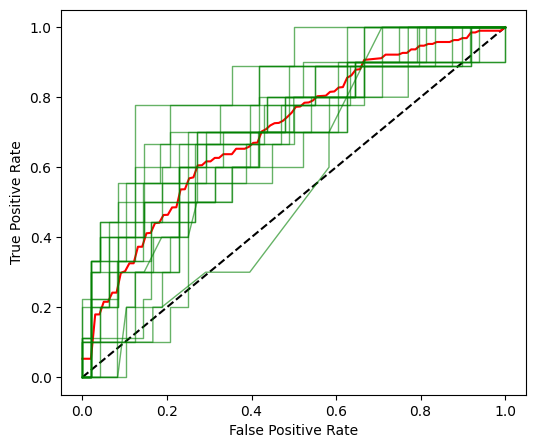

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

mean_tpr = np.mean(tprs_ls, axis=0)
plt.plot(mean_fpr, mean_tpr, color='red')

for i,j in zip(curve_fprs, curve_tprs):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.6, label=None)

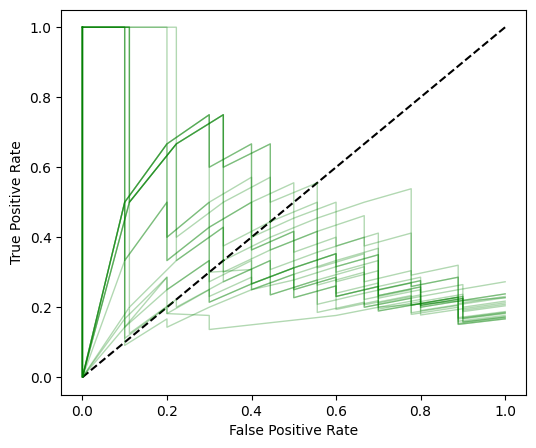

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for i,j in zip(curve_rec, curve_pre):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.3, label=None)

In [ ]:
merge_df= pd.read_csv('MIDAS_imputation_copy3.csv')

In [46]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
seed = 7
skfold = RepeatedStratifiedKFold(n_splits=10,random_state=seed,n_repeats=10)

proba_score = []
predict_score = []
acc_score = []
re_score = []
prauc_score = []
specifi_score = []
cm1_score = []

curve_fprs = []
curve_tprs = []
curve_thresholds = []

curve_pre = []
curve_rec = []
curve_thr = []

tprs_ls = []
mean_fpr = np.linspace(0,1,100)

x_df = merge_df.drop(['Key','cutoff'],axis=1)
y_df = merge_df['cutoff']

sc = StandardScaler()
x_df = pd.DataFrame(sc.fit_transform(x_df), columns=x_df.columns)

for j, (train_idx, val_idx) in enumerate(skfold.split(x_df,y_df)):

    x_train, y_train = x_df.iloc[train_idx], y_df.iloc[train_idx]
    x_test, y_test = x_df.iloc[val_idx], y_df.iloc[val_idx]

    x_train_sk, x_val_sk, y_train_sk, y_val_sk = train_test_split(x_train,y_train,stratify=y_train, random_state=seed, test_size=0.2)

    #SMOTE로 타겟의 분포를 균등하게 조절
    smote = SMOTE(random_state=42)
    x_train_sk, y_train_sk = smote.fit_resample(x_train_sk, y_train_sk)
    print(' 변화된 값의 분포 :\n',pd.Series(y_train_sk).value_counts() )
    
    
    model = catboost.CatBoostClassifier(
                                    use_best_model=True,
                                    eval_metric='AUC',
                                    verbose=False,
                                    random_state=seed
                                    )
    D_train = catboost.Pool(x_train_sk, y_train_sk)
    D_test = catboost.Pool(x_val_sk, y_val_sk)

    model.fit(D_train, eval_set=D_test, verbose=False)

    pred = model.predict_proba(x_test)[:,1]
    fprs, tprs, thresholds = roc_curve(y_test, pred)

    tprs_ls.append(np.interp(mean_fpr, fprs, tprs))

    curve_tprs.append(tprs)
    curve_fprs.append(fprs)
    curve_thresholds.append(thresholds)

    J = tprs - fprs
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    precision, recall, th = precision_recall_curve(y_test, pred)
    prauc = auc(recall, precision)

    curve_pre.append(precision)
    curve_rec.append(recall)
    curve_thr.append(th)
        
    cm1 = confusion_matrix(y_test, np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0))

    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print(j,'번째')
    print('Youden index threshold : ',best_thresh)

    print('roc_auc_score : ',roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    print('acc : ',accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    print('sensitivity : ',Sensitivity)
    print('specificity : ',Specificity)
    print('pr_auc : ',prauc,'\n')
    print(cm1)

    proba_score.append(roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))
    acc_score.append(accuracy_score(y_test,np.where(model.predict_proba(x_test)[:,1] >= best_thresh , 1, 0)))
    re_score.append(Sensitivity)
    specifi_score.append(Specificity)
    prauc_score.append(prauc)
    cm1_score.append(cm1)

 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
0 번째
Youden index threshold :  0.15958087879427754
roc_auc_score :  0.875
acc :  0.8620689655172413
sensitivity :  0.8
specificity :  0.875
pr_auc :  0.6002930402930403 

[[21  3]
 [ 1  4]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
1 번째
Youden index threshold :  0.4845386827925271
roc_auc_score :  0.825
acc :  0.7586206896551724
sensitivity :  0.8
specificity :  0.75
pr_auc :  0.6177450980392156 

[[18  6]
 [ 1  4]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
2 번째
Youden index threshold :  0.40987297133874034
roc_auc_score :  0.9083333333333333
acc :  0.8620689655172413
sensitivity :  1.0
specificity :  0.8333333333333334
pr_auc :  0.4755555555555555 

[[20  4]
 [ 0  5]]
 변화된 값의 분포 :
 0    174
1    174
Name: cutoff, dtype: int64
3 번째
Youden index threshold :  0.18464159927901494
roc_auc_score :  0.8
acc :  0.7931034482758621
sensitivity :  0.8
specificity :  0.7916666666666666
pr_auc :  0.3430228

In [47]:
print('proba_score',np.mean(proba_score))
print('re_score',np.mean(re_score))
print('specifi_score',np.mean(specifi_score))
proba_score

proba_score 0.7348208333333333
re_score 0.768
specifi_score 0.76825


[0.875,
 0.825,
 0.9083333333333333,
 0.8,
 0.9333333333333333,
 0.6583333333333334,
 0.8166666666666667,
 0.4916666666666667,
 0.9,
 0.5,
 0.525,
 0.8,
 0.7833333333333334,
 0.7666666666666667,
 0.75,
 0.8,
 0.75,
 0.55,
 0.83,
 0.8958333333333333,
 0.6666666666666666,
 0.8,
 0.7916666666666667,
 0.6833333333333333,
 0.6666666666666666,
 0.8499999999999999,
 0.7583333333333333,
 0.625,
 0.74,
 0.84375,
 0.8666666666666667,
 0.7333333333333334,
 0.5833333333333334,
 0.8500000000000001,
 0.7833333333333333,
 0.5916666666666667,
 0.7,
 0.7,
 0.89,
 0.8541666666666666,
 0.4666666666666667,
 0.8166666666666667,
 0.6333333333333333,
 0.8,
 0.7833333333333333,
 0.9583333333333334,
 0.6166666666666667,
 0.9416666666666667,
 0.82,
 0.5833333333333333,
 0.6666666666666667,
 0.49999999999999994,
 0.7916666666666665,
 0.6333333333333334,
 0.7166666666666668,
 0.75,
 0.6166666666666667,
 0.9083333333333332,
 0.9199999999999999,
 0.8020833333333334,
 0.95,
 0.7166666666666667,
 0.8083333333333333,


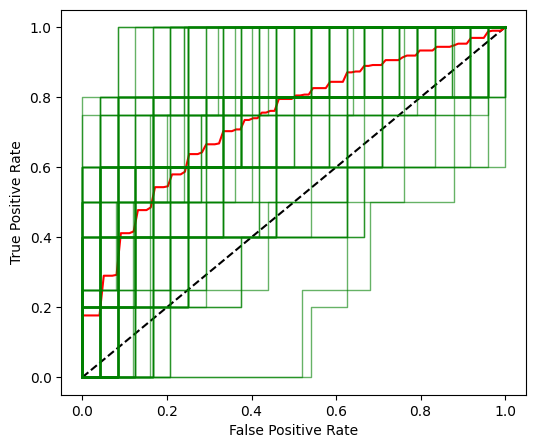

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

mean_tpr = np.mean(tprs_ls, axis=0)
plt.plot(mean_fpr, mean_tpr, color='red')

for i,j in zip(curve_fprs, curve_tprs):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.6, label=None)

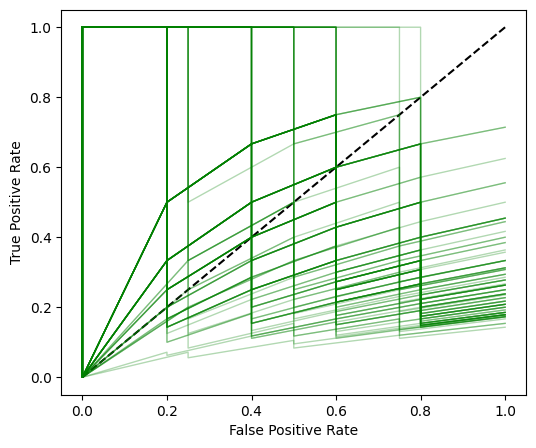

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot([0,1],[0,1],'--',color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for i,j in zip(curve_rec, curve_pre):
    plt.plot(i, j, color='green', linewidth=1, alpha=0.3, label=None)

In [50]:
CF_item = pd.DataFrame()
CF_item['proba_score'] = proba_score
CF_item['re_score'] = re_score
CF_item['specifi_score'] = specifi_score 
CF_item.to_csv('MIDAS_copy3_SMOTE_1010.csv',index=False)